# EDA для RAG

Для RAG нужны данные:
1. Сама документация по которой искать
2. Вопросы

Реальных запросов на текущий момент нет. Есть только сгенерированная синтетика с помощью claude 3.7.

В рамках EDA требуется оценить есть ли мусор в статьях документации. Насколько полно документация содержит информацию о сгенерированных вопросах.

Исходные данные для анализа лежат тут https://drive.google.com/file/d/1cpcp4WnIIqEUWHZhJNZmIt-_wrHCLfTw/view?usp=sharing

## Анализ наличия мусора в спаршенных данных

In [16]:
import os
import json
from PIL import Image

In [3]:
os.listdir('../metamask_data/articles/')

['article_35d3d1b99b83dc25cf8eac578705046c.json',
 'article_0ef1056b09cb63062cfb6028d384351b.json',
 'article_ce0da48ea9df6abe17f05db2594c97ef.json',
 'article_0927440bd27fef169f064fd129b59828.json',
 'article_d1654c1d354251b95eaa373c69db8557.json',
 'article_fcccf5489abbac0c749a12eaecde8b73.json',
 'article_6dc79f4cc47c7fbc7451e753a0a8c63c.json',
 'article_1e8b96159ee3718bfa074df353616453.json',
 'article_15cb70c1e728eacf3cd05cbabbf25384.json',
 'article_aa55d15270e7893ed4107b19f2717e5f.json',
 'article_4027a5552351fb092f61da8704b05f45.json',
 'article_cd7a1e2776fe017b1170f0e34d8f2d5d.json',
 'article_5731083d36dc8321f7700caf6f963614.json',
 'article_1363e04db60107aad12d2ef3f093ecb9.json',
 'article_613ffbdee003bb654d6a28e684e95601.json',
 'article_1daa944ca3941d039c956720ca9058a6.json',
 'article_c79d71ec49cb9417eb1f9c87510d616d.json',
 'article_43d7c2f197ef8eda319438bc085e2fb3.json',
 'article_890c9be2f8644956ce7e5f7fae638193.json',
 'article_06e55877c8aa90d41aeae3e98fe6e38f.json',


**Отрываем пример файла, переходим по исходной ссылке: проверяем, что текст документации на сайте, соответствует спаршенному тексту**

In [4]:
filepaths = ['../metamask_data/articles/article_35d3d1b99b83dc25cf8eac578705046c.json', '../metamask_data/articles/article_0ef1056b09cb63062cfb6028d384351b.json']

In [8]:
with open(filepaths[0], 'r') as file:
    data = json.load(file)

In [10]:
data['url']

'https://support.metamask.io/start/how-to-copy-your-metamask-account-public-address-/'

In [11]:
data['title']

'How to copy your MetaMask account public address'

In [13]:
data['content_text']

"Start\nHow to copy your MetaMask account public address\nOn this page\nHow to copy your MetaMask account public address\nDoes this article need to be translated?\nContribute to the Help Center\nSubmit translations, corrections, and suggestions on GitHub, or reach out on our Community forums.\n[[IMAGE:images/2e218a493c5aefa67f6a696056ace55e.svg|GitHub]]\nGitHub\n[[IMAGE:images/f11707961bf33a8e6b8b3f14bbbfa2f4.svg|Community]]\nCommunity\nIf you're unable to copy the correct address from MetaMask, see\nbelow\nfor a potential explanation.\nIn MetaMask, you can copy your account's public address by clicking on it.\nTo access additional information about your account, see instructions\nhere\n.\nExtension\nMobile\nLocate your shortened public address underneath the account selector at the top of the screen. Click to copy your clipboard:\n[[IMAGE:images/1311e409b36f477421037eddd33ddc4e.jpg|MetaMask copy account address button and popover]]\nIn wallet view, tap on the shortened address below t

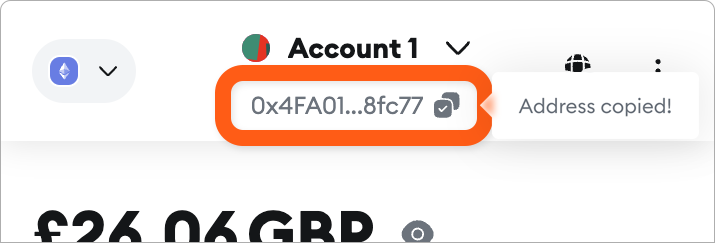

In [20]:
img = Image.open('../metamask_data/images/1311e409b36f477421037eddd33ddc4e.jpg')
display(img)

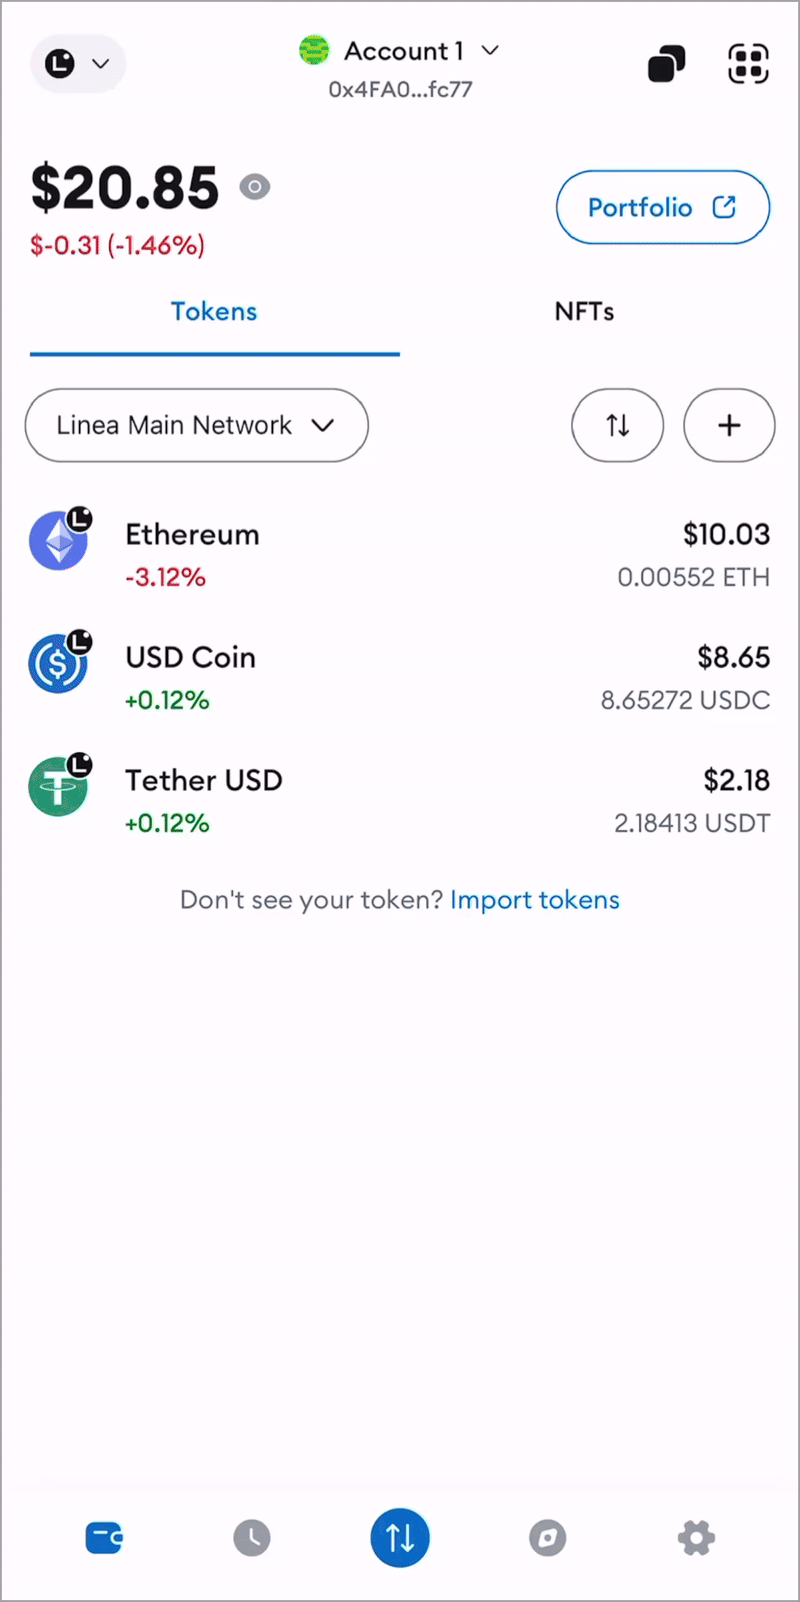

In [21]:
img = Image.open('../metamask_data/images/7b7e909adea464e5c9427efc5769db6b.jpg')
display(img)

In [25]:
data['images']

[{'id': '2e218a493c5aefa67f6a696056ace55e',
  'original_url': 'https://support.metamask.io/img/icon_github.svg',
  'filename': '2e218a493c5aefa67f6a696056ace55e.svg',
  'article_id': '35d3d1b99b83dc25cf8eac578705046c',
  'title': 'GitHub',
  'local_path': 'images/2e218a493c5aefa67f6a696056ace55e.svg'},
 {'id': 'f11707961bf33a8e6b8b3f14bbbfa2f4',
  'original_url': 'https://support.metamask.io/img/icon_community.svg',
  'filename': 'f11707961bf33a8e6b8b3f14bbbfa2f4.svg',
  'article_id': '35d3d1b99b83dc25cf8eac578705046c',
  'title': 'Community',
  'local_path': 'images/f11707961bf33a8e6b8b3f14bbbfa2f4.svg'},
 {'id': '1311e409b36f477421037eddd33ddc4e',
  'original_url': 'https://csct-assets.infura-ipfs.io/ipfs/QmPH8b2eShEbQmNfWp3HFzKrcWCPx1vL5fM8ASbmJUJ7m3',
  'filename': '1311e409b36f477421037eddd33ddc4e.jpg',
  'article_id': '35d3d1b99b83dc25cf8eac578705046c',
  'title': 'MetaMask copy account address button and popover',
  'local_path': 'images/1311e409b36f477421037eddd33ddc4e.jpg'},
 

**Мусор:**
1. "Does this article need to be translated?" и тд
2. Парсятся фотки github и community
3. Присутствует мусорные символы: "â\x80\x94"

**В целом страничка спаршена корректно, фото также сохранены корректно**

## Анализ полноты спаршенной документации и вопросов

Сгенерированные вопросы лежат тут https://drive.google.com/file/d/1IvsLWSHnc7NKw5o2uLwMwJulR2PVoHZ5/view?usp=sharing

In [32]:
with open('../data/metamast_queries.txt', 'r') as file:
    for line in file:
        print(line, end='')

## Установка и начальная настройка

1. "Как установить MetaMask на мой браузер?"
2. "Как установить мобильное приложение MetaMask?"
3. "Нужно ли мне устанавливать MetaMask на компьютер, если у меня уже есть мобильная версия?"
4. "Как создать новый кошелек в MetaMask?"
5. "Что такое сид-фраза и зачем она нужна?"
6. "Где в интерфейсе MetaMask создать новый кошелек?"
7. "Почему MetaMask просит меня записать секретные слова?"
8. "Как безопасно хранить мою сид-фразу от MetaMask?"
9. "Нужно ли фотографировать экран с секретной фразой?"
10. "Что делать, если я потерял секретную фразу от MetaMask?"
11. "Как создать пароль для доступа к MetaMask?"
12. "Каким должен быть надежный пароль для MetaMask?"
13. "Как подтвердить, что я правильно записал секретную фразу?"
14. "Как импортировать существующий кошелек в MetaMask?"
15. "Что безопаснее: создать новый кошелек или импортировать существующий?"
16. "Где находится мой адрес кошелька в MetaMask?"
17. "Как скопировать адрес моего кошелька?"
18. "Ка

*Вопросы разбиты по темам, на первый взгляд темы покрывают все что нужно.*

**Возьмем из каждой группы рандомный вопрос и проверим есть ли информация в статьях для ответа на этот вопрос**

*Будем искать через уже поднятый сервис RAG тут http://46.8.158.43:8001/docs*

*Если запрос не нашелся с помощью сервиса, погуглим и проверим есть ли где-то в доментации информация об этом*

**В первой группе на вопрос:**

Что делать, если я потерял секретную фразу от MetaMask? - Ответ в документации есть 
Основная информация:
https://support.metamask.io/configure/accounts/can-i-access-my-accounts-without-my-secret-recovery-phrase/
Частично тут:
https://support.metamask.io/start/learn/what-is-a-secret-recovery-phrase-and-how-to-keep-your-crypto-wallet-secure/

В моих данных информации по первой ссылке нет, по второй есть.

**Во второй группе на вопрос:**
Где найти адрес контракта токена для добавления в MetaMask?

Ответ в документации есть:
Основная информация:
https://support.metamask.io/ru/manage-crypto/tokens/how-to-find-a-token-contract-address/
Частично тут:
https://support.metamask.io/manage-crypto/tokens/how-to-display-tokens-in-metamask/

В моих данных ничего об этом нет.


**В третьей группе:**
Что означает запрос на подпись сообщения в MetaMask?

Ответ тут: https://support.metamask.io/start/learn/what-is-a-signature-in-metamask/

В моих данных тоже есть данные по этой статье.

**В четвертой группе:**

Как восстановить доступ к MetaMask на новом устройстве?

информация тут:
https://support.metamask.io/configure/wallet/how-to-restore-your-metamask-wallet-from-secret-recovery-phrase/

В моих данных по этой ссылке нет статьи

Группы 5, 6, 7 для ускорения были объеденены.


**Для групп 5, 6, 7:**

Как узнать текущую цену газа перед отправкой транзакции?

информация есть тут:

https://support.metamask.io/more-web3/learn/user-guide-gas/
и тут
https://support.metamask.io/more-web3/learn/how-to-estimate-the-gas-fee/

Обоих ссылок у меня нет

## Результат

Данные спаршены не идеально, есть мусор, но его количество не критично.

Полнота данных оставляет желать лучшего, для синтетических вопросов лишь для 1 из 5 есть нужная информация в спаршенных данных.